In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas_datareader as pdr
% matplotlib inline

In [2]:
import fix_yahoo_finance as fyf
from pandas_datareader import data as pdr

In [3]:
fyf.pdr_override()

In [4]:
#Companies: 
#Aphria Inc., Cronos Group Inc., Emerald Health Therapeutics, Inc., OrganiGram Holdings Inc., Canopy Growth Corporation
#tickers 
# ['APH', 'CRON.TO', 'EMH.V', 'OGI.V', 'WEED.TO']; NOT FOR ANALYSIS:'ACB.TO','FIRE.V', 'HEXO.TO', 'N.V', 

# Stocks Data

In [5]:
#Aphria Inc.Stocks
APH_stocks = pdr.get_data_yahoo('APH', start = '2014-01-01')
APH_stocks.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,44.365002,44.395000,43.730000,43.869999,41.707447,883600
2014-01-03,43.880001,44.160000,43.814999,44.029999,41.859547,766800
2014-01-06,44.230000,44.230000,43.584999,43.625000,41.474518,783800
2014-01-07,43.810001,44.180000,43.669998,43.919998,41.754967,610200
2014-01-08,43.919998,44.334999,43.814999,44.165001,41.987892,853800


In [6]:
#Cronos Group Inc. stocks
CRON_stocks = pdr.get_data_yahoo('CRON.TO', start = '2014-01-01')
CRON_stocks.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-17,1.00,1.00,0.77,0.80,0.80,182000
2014-12-18,0.85,0.85,0.80,0.83,0.83,696100
2014-12-19,0.84,0.84,0.81,0.82,0.82,247400
2014-12-22,0.83,0.83,0.79,0.80,0.80,83900
2014-12-23,0.79,0.79,0.74,0.75,0.75,0


In [7]:
#Emerald Health Therapeutics, Inc. stocks
EMHV_stocks = pdr.get_data_yahoo('EMH.V', start = '2014-01-01')
EMHV_stocks.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,0.45,0.45,0.45,0.45,0.45,0
2014-01-03,0.45,0.45,0.45,0.45,0.45,0
2014-01-06,0.45,0.45,0.45,0.45,0.45,0
2014-01-07,0.45,0.45,0.45,0.45,0.45,0
2014-01-08,0.45,0.45,0.45,0.45,0.45,0


In [8]:
#OrganiGram Holdings Inc. stocks
OGI_stocks = pdr.get_data_yahoo('OGI.V', start = '2014-01-01')
OGI_stocks.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,0.09626,0.09626,0.09626,0.09626,0.09626,0
2014-01-03,0.09626,0.09626,0.09626,0.09626,0.09626,900
2014-01-06,0.09626,0.09626,0.09626,0.09626,0.09626,0
2014-01-07,0.09626,0.09626,0.09626,0.09626,0.09626,0
2014-01-08,0.09626,0.09626,0.09626,0.09626,0.09626,0


In [9]:
#Canopy Growth Corporation stocks
WEED_stocks = pdr.get_data_yahoo('WEED.TO', start = '2014-01-01')
WEED_stocks.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,0.01,0.01,0.01,0.01,0.01,0
2014-01-03,0.01,0.01,0.01,0.01,0.01,0
2014-01-06,0.01,0.01,0.01,0.01,0.01,0
2014-01-07,0.01,0.01,0.01,0.01,0.01,0
2014-01-08,0.01,0.01,0.01,0.01,0.01,0


In [10]:
AdjClose = pd.DataFrame({'APH':APH_stocks['Adj Close'],'CRON':CRON_stocks['Adj Close'],
                             'EMHV':EMHV_stocks['Adj Close'],'OGI':OGI_stocks['Adj Close'],
                             'WEED':WEED_stocks['Adj Close']})
AdjClose.index.names = ['Date']
#TLiabilities.index = pd.to_numeric(TLiabilities.index)
#TLiabilities.index = TLiabilities.index.astype(dtype='object')
AdjClose.head()

,APH,CRON,EMHV,OGI,WEED
Date,,,,,
2014-01-02,41.707447,NaN,0.45,0.09626,0.01
2014-01-03,41.859547,NaN,0.45,0.09626,0.01
2014-01-06,41.474518,NaN,0.45,0.09626,0.01
2014-01-07,41.754967,NaN,0.45,0.09626,0.01
2014-01-08,41.987892,NaN,0.45,0.09626,0.01


In [11]:
AdjClose.tail()

,APH,CRON,EMHV,OGI,WEED
Date,,,,,
2018-11-19,86.160004,10.95,3.74,5.39,43.099998
2018-11-20,84.169998,10.86,3.56,5.20,42.520000
2018-11-21,84.870003,11.26,3.89,5.40,44.639999
2018-11-22,NaN,11.25,3.70,5.40,44.299999
2018-11-23,84.980003,11.50,3.71,5.47,44.369999


In [12]:
pp.ProfileReport(AdjClose)

Number of variables,6
Number of observations,1254
Total Missing (%),3.8%
Total size in memory,58.9 KiB
Average record size in memory,48.1 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,3


# Financial Statements Data

In [13]:
#Aphria Inc. Income Statement
APH_IncSt = pd.read_csv('DataFiles/APH.csv', parse_dates = True)
APH_IncSt.rename(columns={'Revenue':'RC', '2017-12-31':2017, '2016-12-31':2016, '2015-12-31':2015, 
                          '2014-12-31':2014}, inplace=True)
APH_IncSt.set_index('RC',inplace = True)
APH_IncSt.head()

,2017,2016,2015,2014
RC,,,,
Total Revenue,7011300,6286400,5568700,5345500
Cost of Revenue,4701400,4246400,3789200,3651700
Gross Profit,2309900,2040000,1779500,1693800
Research Development,193700,166100,124700,114800
Selling General and Administrative,684600,632100,544400,530300


In [14]:
#Aphria Inc.Balance Sheet
APH_BalSh = pd.read_csv('DataFiles/APH1.csv', parse_dates = True)
#dtype={'Period Ending':str,'2017-12-31': np.int32,'2016-12-31':np.int32, '2015-12-31': np.int32, '2014-12-31': np.int32}
APH_BalSh.rename(columns={'Period Ending':'AL', '2017-12-31':2017, '2016-12-31':2016, '2015-12-31':2015, 
                          '2014-12-31':2014}, inplace=True)
APH_BalSh.set_index('AL',inplace = True)
APH_BalSh.head()


,2017,2016,2015,2014
AL,,,,
Cash And Cash Equivalents,1719100.0,1034600.0,1737200.0,968900.0
Short Term Investments,34600.0,138600.0,23200.0,360700.0
Net Receivables,1598600.0,1349300.0,1104600.0,1123700.0
Inventory,1106900.0,928900.0,851800.0,865600.0
Other Current Assets,196800.0,139800.0,133200.0,133300.0


In [15]:
#Cronos Group Inc. Income Statement
CRON_IncSt = pd.read_csv('DataFiles/CRON.csv', parse_dates = True)
CRON_IncSt.rename(columns={'Revenue':'RC', '2017-12-31':2017, '2016-12-31':2016, '2015-12-31':2015, 
                          '2014-12-31':2014}, inplace=True)
CRON_IncSt.set_index('RC',inplace = True)
CRON_IncSt.head()

,2017,2016,2015,2014
RC,,,,
Total Revenue,4082,554,3404.800,665.076
Cost of Revenue,3148,2164,899.482,37.339
Gross Profit,7230,2718,2505.320,702.415
Research Development,0,0,0.000,0.000
Selling General and Administrative,8797,3742,1945.360,2341.440


In [16]:
#Cronos Group Inc. Balance Sheet
CRON_BalSh = pd.read_csv('DataFiles/CRON1.csv')
CRON_BalSh.rename(columns={'Period Ending':'AL', '2017-12-31':2017, '2016-12-31':2016, '2015-12-31':2015, 
                          '2014-12-31':2014}, inplace=True)
CRON_BalSh.set_index('AL',inplace = True)
CRON_BalSh.head()


,2017,2016,2015,2014
AL,,,,
Cash And Cash Equivalents,9208.0,3464.0,1127.34,795.53
Short Term Investments,0.0,0.0,0.00,0.00
Net Receivables,4568.0,416.0,0.00,716.29
Inventory,12138.0,3703.0,0.00,20.00
Other Current Assets,0.0,0.0,0.00,0.00


In [17]:
#Emerald Health Therapeutics, Inc.Income Statement
EMHV_IncSt = pd.read_csv('DataFiles/EMHV.csv', parse_dates = True)
EMHV_IncSt.rename(columns={'Revenue':'RC', '2017-12-31':2017, '2016-12-31':2016, '2015-12-31':2015, 
                          '2014-12-31':2014}, inplace=True)
EMHV_IncSt.set_index('RC',inplace = True)
EMHV_IncSt.head()

,2017,2016,2015,2014
RC,,,,
Total Revenue,937.654,253.321,31.291,0.000
Cost of Revenue,1223.170,603.267,203.802,0.000
Gross Profit,285.517,349.946,172.511,0.000
Research Development,207.500,301.526,162.316,40.066
Selling General and Administrative,5498.990,1452.220,1931.200,1110.060


In [18]:
#Emerald Health Therapeutics, Inc.Balance Sheet
EMHV_BalSh = pd.read_csv('DataFiles/EMHV1.csv')
EMHV_BalSh.rename(columns={'Period Ending':'AL', '2017-12-31':2017, '2016-12-31':2016, '2015-12-31':2015, 
                          '2014-12-31':2014}, inplace=True)
EMHV_BalSh.set_index('AL',inplace = True)
EMHV_BalSh.head()

,2017,2016,2015,2014
AL,,,,
Cash And Cash Equivalents,44523.150,3217.210,81.836,1718.800
Short Term Investments,0.000,0.000,0.000,0.000
Net Receivables,278.232,28.701,42.140,42.548
Inventory,842.194,323.034,171.066,6.595
Other Current Assets,324.674,0.000,0.000,0.000


In [19]:
#OrganiGram Holdings Inc. Income Statement
OGI_IncSt = pd.read_csv('DataFiles/OGI.csv')
OGI_IncSt.rename(columns={'Revenue':'RC', '2017-08-31':2017, '2016-08-31':2016, '2015-08-31':2015, 
                          '2014-08-31':2014}, inplace=True)
OGI_IncSt.set_index('RC',inplace = True)
OGI_IncSt.head()

,2017,2016,2015,2014
RC,,,,
Total Revenue,5713.70,6127.620,986.676,0.000
Cost of Revenue,8840.79,813.379,339.511,274.905
Gross Profit,3127.09,5314.250,1326.190,274.905
Research Development,0.00,0.000,0.000,0.000
Selling General and Administrative,6336.57,3626.260,2228.400,874.212


In [20]:
#OrganiGram Holdings Inc.Balance Sheet
OGI_BalSh = pd.read_csv('DataFiles/OGI1.csv')
OGI_BalSh.rename(columns={'Period Ending':'AL', '2018-02-28':2017, '2017-02-28':2016, '2016-02-29':2015, 
                          '2015-02-28':2014}, inplace=True)
OGI_BalSh.set_index('AL',inplace = True)
OGI_BalSh.head()

,2017,2016,2015,2014
AL,,,,
Cash And Cash Equivalents,73.491,14.405,9.650,11.328
Short Term Investments,0.000,0.000,0.000,0.000
Net Receivables,23.638,8.657,11.659,10.962
Inventory,0.000,0.000,35.481,0.000
Other Current Assets,0.000,0.000,10.755,111.099


In [21]:
#Canopy Growth Corporation Income Statement
WEED_IncSt = pd.read_csv('DataFiles/WEED.csv')
WEED_IncSt.rename(columns={'Revenue':'RC', '2018-03-31':2017, '2017-03-31':2016, '2016-03-31':2015,
                          '2015-03-31':2014}, inplace=True)
WEED_IncSt.set_index('RC',inplace = True)
WEED_IncSt.head()

,2017,2016,2015,2014
RC,,,,
Total Revenue,77948,39895,12699,1896.8
Cost of Revenue,3756,1181,6287,364.0
Gross Profit,74192,38714,18986,2260.8
Research Development,1453,810,721,213.6
Selling General and Administrative,82022,29818,13830,6048.0


In [22]:
#Canopy Growth Corporation Balance Sheet
WEED_BalSh = pd.read_csv('DataFiles/WEED1.csv')
WEED_BalSh.rename(columns={'Period Ending':'AL', '2018-03-31':2017, '2017-03-31':2016, '2016-03-31':2015,
                          '2015-03-31':2014}, inplace=True)
WEED_BalSh.set_index('AL',inplace = True)
WEED_BalSh.head()

,2017,2016,2015,2014
AL,,,,
Cash And Cash Equivalents,322560,101800,15397,21446
Short Term Investments,0,0,0,0
Net Receivables,21425,5815,1486,773
Inventory,117955,60706,27474,6383
Other Current Assets,3705,7531,0,10


# Financial Statements Analysis

In [23]:
#working on a fuction to calculate the financial ratios (not going well so far)
def Ratio (a, b):
    return a/b

In [24]:
#create a dataframe for Total Liabilities by company
TLiabilities = pd.DataFrame({'APH':APH_BalSh.loc['Total Liabilities'],'CRON':CRON_BalSh.loc['Total Liabilities'],
                             'EMHV':EMHV_BalSh.loc['Total Liabilities'],'OGI':OGI_BalSh.loc['Total Liabilities'],
                             'WEED':WEED_BalSh.loc['Total Liabilities']})
TLiabilities.index.names = ['Year']
#TLiabilities.index = pd.to_numeric(TLiabilities.index)
TLiabilities.index = TLiabilities.index.astype(dtype='object')
TLiabilities

,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,5960500.0,14661.00,5943.650,202.195,193579
2016,4775600.0,9223.00,474.035,294.016,62994
2015,4180000.0,3021.99,1184.880,148.122,19576
2014,4048000.0,1070.70,133.860,63.009,6365


In [25]:
#create a dataframe for Total Assets by company
TAssets = pd.DataFrame({'APH':APH_BalSh.loc['Total Assets'],'CRON':CRON_BalSh.loc['Total Assets'],
                             'EMHV':EMHV_BalSh.loc['Total Assets'],'OGI':OGI_BalSh.loc['Total Assets'],
                             'WEED':WEED_BalSh.loc['Total Assets']})
TAssets.index.names = ['Year']
#TAssets.index = pd.to_numeric(TAssets.index)
TAssets.index = TAssets.index.astype(dtype='object')
TAssets

,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,10003900.0,101029.00,73730.840,105.814,1436817
2016,8498700.0,42900.00,4176.330,25.062,702720
2015,7458400.0,14723.85,771.679,143.445,143361
2014,6985900.0,10342.46,2041.530,255.227,47774


In [26]:
#create a dataframe for Current Liabilities by company
CLiabilities = pd.DataFrame({'APH':APH_BalSh.loc['Total Current Liabilities'],'CRON':CRON_BalSh.loc['Total Current Liabilities'],
                             'EMHV':EMHV_BalSh.loc['Total Current Liabilities'],'OGI':OGI_BalSh.loc['Total Current Liabilities'],
                             'WEED':WEED_BalSh.loc['Total Current Liabilities']})
CLiabilities.index.names = ['Year']
#CLiabilities.index = pd.to_numeric(CLiabilities.index)
CLiabilities.index = CLiabilities.index.astype(dtype='object')
CLiabilities

,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,1579400.0,7878.00,5626.150,202.195,92028
2016,1635200.0,7766.00,474.035,294.016,17665
2015,1008400.0,2326.99,1184.880,148.122,7193
2014,1045600.0,704.70,133.860,63.009,4525


In [27]:
#create a dataframe for Current Assets by company
CAssets = pd.DataFrame({'APH':APH_BalSh.loc['Total Current Assets'],'CRON':CRON_BalSh.loc['Total Current Assets'],
                             'EMHV':EMHV_BalSh.loc['Total Current Assets'],'OGI':OGI_BalSh.loc['Total Current Assets'],
                             'WEED':WEED_BalSh.loc['Total Current Assets']})
CAssets.index.names = ['Year']
#CAssets.index = pd.to_numeric(CAssets.index)
CAssets.index = CAssets.index.astype(dtype='object')
CAssets

,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,4656000.0,26704.00,46136.160,105.814,481777
2016,3591200.0,8086.00,3601.720,25.062,178786
2015,3850000.0,1225.09,322.778,67.545,44846
2014,3452200.0,1578.05,1838.830,179.327,29376


In [28]:
#create a dataframe for Net Income by company
NetIncome = pd.DataFrame({'APH':APH_IncSt.loc['Net Income'],'CRON':CRON_IncSt.loc['Net Income'],
                          'EMHV':EMHV_IncSt.loc['Net Income'],'OGI':OGI_IncSt.loc['Net Income'],
                          'WEED':WEED_IncSt.loc['Net Income']})
NetIncome.index.names = ['Year']
#NetIncome.index = pd.to_numeric(NetIncome.index)
NetIncome.index = NetIncome.index.astype(dtype='object')
NetIncome


,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,650500,2491.000,8731.83,10889.680,70353.0
2016,822900,1190.000,2940.50,846.663,7521.0
2015,763500,386.166,3497.27,1276.850,3496.0
2014,709100,4792.190,2645.11,8424.810,7476.8


In [29]:
#create a dataframe for Shareholder Equity by company
SHEquity = pd.DataFrame({'APH':APH_BalSh.loc['Total Stockholder Equity'],'CRON':CRON_BalSh.loc['Total Stockholder Equity'],
                             'EMHV':EMHV_BalSh.loc['Total Stockholder Equity'],'OGI':OGI_BalSh.loc['Total Stockholder Equity'],
                             'WEED':WEED_BalSh.loc['Total Stockholder Equity']})
SHEquity.index.names = ['Year']
#SHEquity.index = pd.to_numeric(SHEquity.index)
SHEquity.index = SHEquity.index.astype(dtype='object')
SHEquity

,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,3989800.0,86368.00,65830.360,96.381,1158773
2016,3674900.0,33677.00,3702.290,268.954,639758
2015,3238500.0,11701.86,413.196,4.677,123785
2014,2907400.0,9271.77,1907.670,192.218,41409


In [30]:
# create a dataframe for outstanding shares = Common Stock line of the Balance Sheet
CommonStock = pd.DataFrame({'APH': APH_BalSh.loc['Common Stock'],
                            'CRON': CRON_BalSh.loc['Common Stock'],
                             'EMHV':EMHV_BalSh.loc['Common Stock'],
                             'OGI':OGI_BalSh.loc['Common Stock'],
                             'WEED':WEED_BalSh.loc['Common Stock']})
CommonStock.index.names = ['Year']
#CommonStock.index = pd.to_numeric(CommonStock.index)
CommonStock.index = CommonStock.index.astype(dtype='object')
CommonStock


,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,300.0,83559.00,77912.25,3665.78,1076838
2016,300.0,33590.00,9756.73,3125.55,621541
2015,300.0,14799.82,3076.97,2731.55,131080
2014,300.0,13586.13,3076.97,2657.11,49826


In [31]:
# Average annual market price per share
AnnualAveClose = pd.DataFrame({'APH':APH_stocks['Adj Close'].groupby(APH_stocks.index.year).mean(),
                               'CRON':CRON_stocks['Adj Close'].groupby(CRON_stocks.index.year).mean(),
                             'EMHV':EMHV_stocks['Adj Close'].groupby(EMHV_stocks.index.year).mean(),
                             'OGI':OGI_stocks['Adj Close'].groupby(OGI_stocks.index.year).mean(),
                             'WEED':WEED_stocks['Adj Close'].groupby(WEED_stocks.index.year).mean()}).sort_index(ascending=0)
AnnualAveClose.index.names = ['Year']
AnnualAveClose.index = AnnualAveClose.index.astype(dtype='object')
AnnualAveClose.drop(AnnualAveClose.index[0], inplace = True)
AnnualAveClose

,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,76.321366,2.763580,1.618760,2.704280,11.498960
2016,58.054928,0.574004,0.469920,1.550797,4.257888
2015,53.459804,0.466135,0.397072,0.512590,1.926494
2014,46.418093,0.795000,0.495777,0.545885,1.931640


In [32]:
# to calculate market value of shares
MarketValue= pd.DataFrame({'APH': AnnualAveClose['APH'] * CommonStock['APH'],
                           'CRON': AnnualAveClose['CRON'] * CommonStock['CRON'],
                           'EMHV': AnnualAveClose['EMHV'] * CommonStock['EMHV'],
                           'OGI': AnnualAveClose['OGI'] * CommonStock['OGI'],
                          'WEED': AnnualAveClose['WEED'] * CommonStock['WEED']})
                                                                                                                                 
MarketValue.index = MarketValue.index.astype(dtype='object')
MarketValue

,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,22896.409890,230921.981220,126121.233810,9913.295538,1.238252e+07
2016,17416.478335,19280.793825,4584.885671,4847.092978,2.646452e+06
2015,16037.941067,6898.720876,1221.777749,1400.164235,2.525248e+05
2014,13925.427925,10800.973350,1525.490625,1450.477286,9.624589e+04


In [33]:
#create a dataframe for Revenue by Company
Revenue = pd.DataFrame({'APH':APH_IncSt.loc['Total Revenue'],'CRON':CRON_IncSt.loc['Total Revenue'],
                             'EMHV':EMHV_IncSt.loc['Total Revenue'],'OGI':OGI_IncSt.loc['Total Revenue'],
                             'WEED':WEED_IncSt.loc['Total Revenue']})
Revenue.index.names = ['Year']
#Revenue.index = pd.to_numeric(Revenue.index)
Revenue.index = Revenue.index.astype(dtype='object')
Revenue

,APH,CRON,EMHV,OGI,WEED
Year,,,,,
2017,7011300,4082.000,937.654,5713.700,77948.0
2016,6286400,554.000,253.321,6127.620,39895.0
2015,5568700,3404.800,31.291,986.676,12699.0
2014,5345500,665.076,0.000,0.000,1896.8


# Financial Ratios Visualization

In [34]:
from pylab import rcParams
import seaborn as sb
#from ggplot import *
rcParams['figure.figsize'] = 15,10
sb.set_style('whitegrid')


In [35]:
DebtRatio = pd.DataFrame({'APH': TLiabilities['APH'] / TAssets['APH'],
                           'CRON': TLiabilities['CRON'] / TAssets['CRON'],
                           'EMHV': TLiabilities['EMHV'] / TAssets['EMHV'],
                           'OGI': TLiabilities['OGI'] / TAssets['OGI'],
                           'WEED': TLiabilities['WEED'] / TAssets['WEED']})
DebtRatio=DebtRatio.round(2)
DebtRatio1 = DebtRatio.transpose()
DebtRatio1



Year,2017,2016,2015,2014
APH,0.60,0.56,0.56,0.58
CRON,0.15,0.21,0.21,0.10
EMHV,0.08,0.11,1.54,0.07
OGI,1.91,11.73,1.03,0.25
WEED,0.13,0.09,0.14,0.13


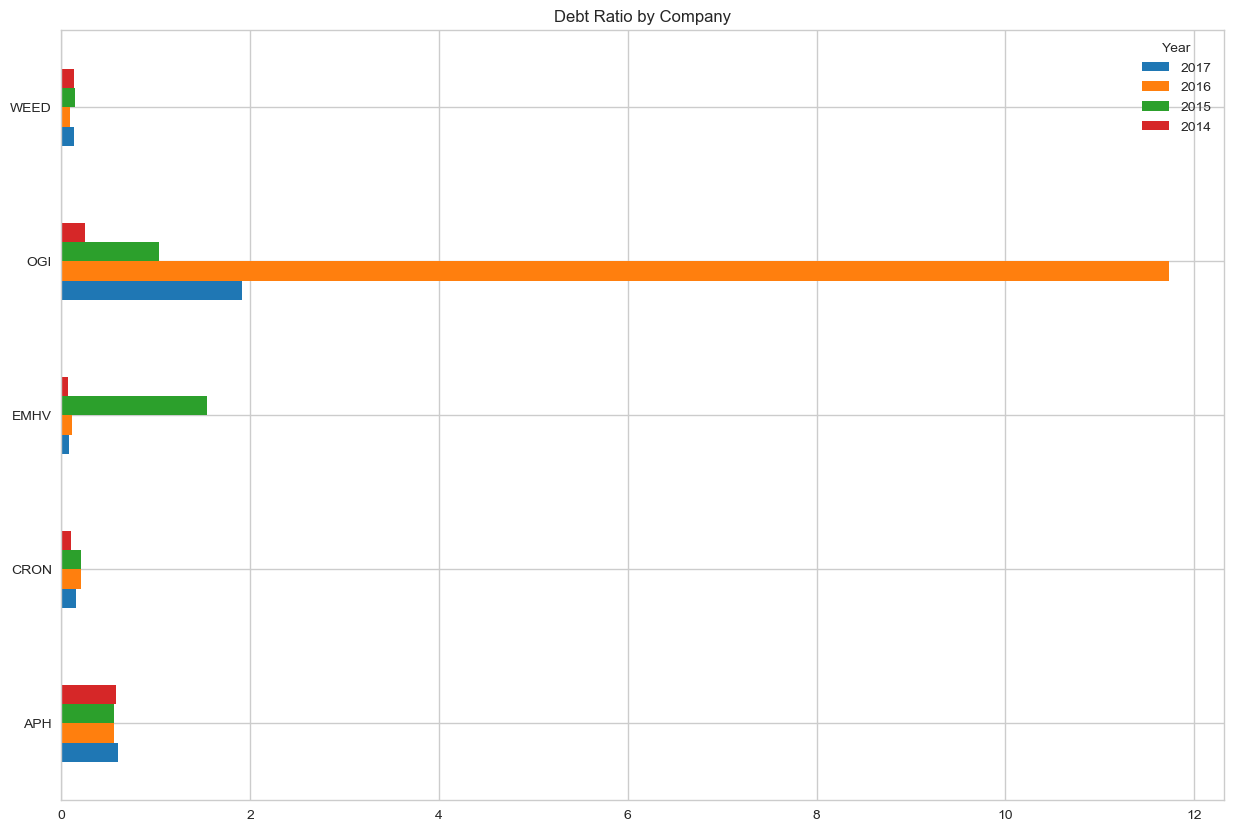

In [36]:
DebtRatio1.plot(kind='barh',title='Debt Ratio by Company');


In [37]:
CurrentRatio = pd.DataFrame({'APH': CAssets['APH'] / CLiabilities['APH'],
                           'CRON': CAssets['CRON'] / CLiabilities['CRON'],
                           'EMHV': CAssets['EMHV'] / CLiabilities['EMHV'],
                           'OGI': CAssets['OGI'] / CLiabilities['OGI'],
                           'WEED': CAssets['WEED'] / CLiabilities['WEED']})
CurrentRatio=CurrentRatio.round(2)
CurrentRatio1 = CurrentRatio.transpose()
CurrentRatio1

Year,2017,2016,2015,2014
APH,2.95,2.20,3.82,3.30
CRON,3.39,1.04,0.53,2.24
EMHV,8.20,7.60,0.27,13.74
OGI,0.52,0.09,0.46,2.85
WEED,5.24,10.12,6.23,6.49


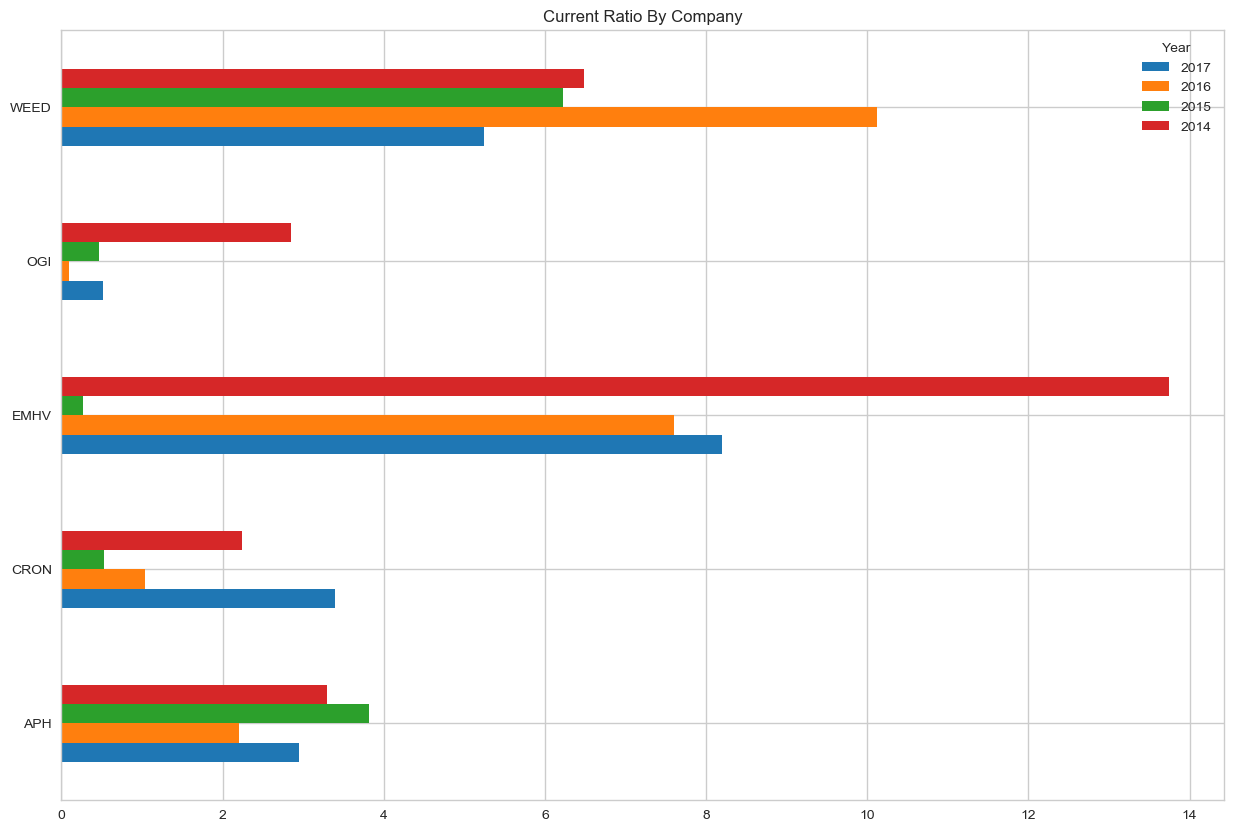

In [38]:
CurrentRatio1.plot(kind='barh',title='Current Ratio By Company');

In [39]:
RetOnEq = pd.DataFrame({'APH': NetIncome['APH'] / SHEquity['APH'],
                           'CRON': NetIncome['CRON'] / SHEquity['CRON'],
                           'EMHV': NetIncome['EMHV'] / SHEquity['EMHV'],
                           'OGI': NetIncome['OGI'] / SHEquity['OGI'],
                           'WEED': NetIncome['WEED'] / SHEquity['WEED']})
RetOnEq = RetOnEq.round(2)
RetOnEq1 = RetOnEq.transpose()
RetOnEq1


Year,2017,2016,2015,2014
APH,0.16,0.22,0.24,0.24
CRON,0.03,0.04,0.03,0.52
EMHV,0.13,0.79,8.46,1.39
OGI,112.99,3.15,273.01,43.83
WEED,0.06,0.01,0.03,0.18


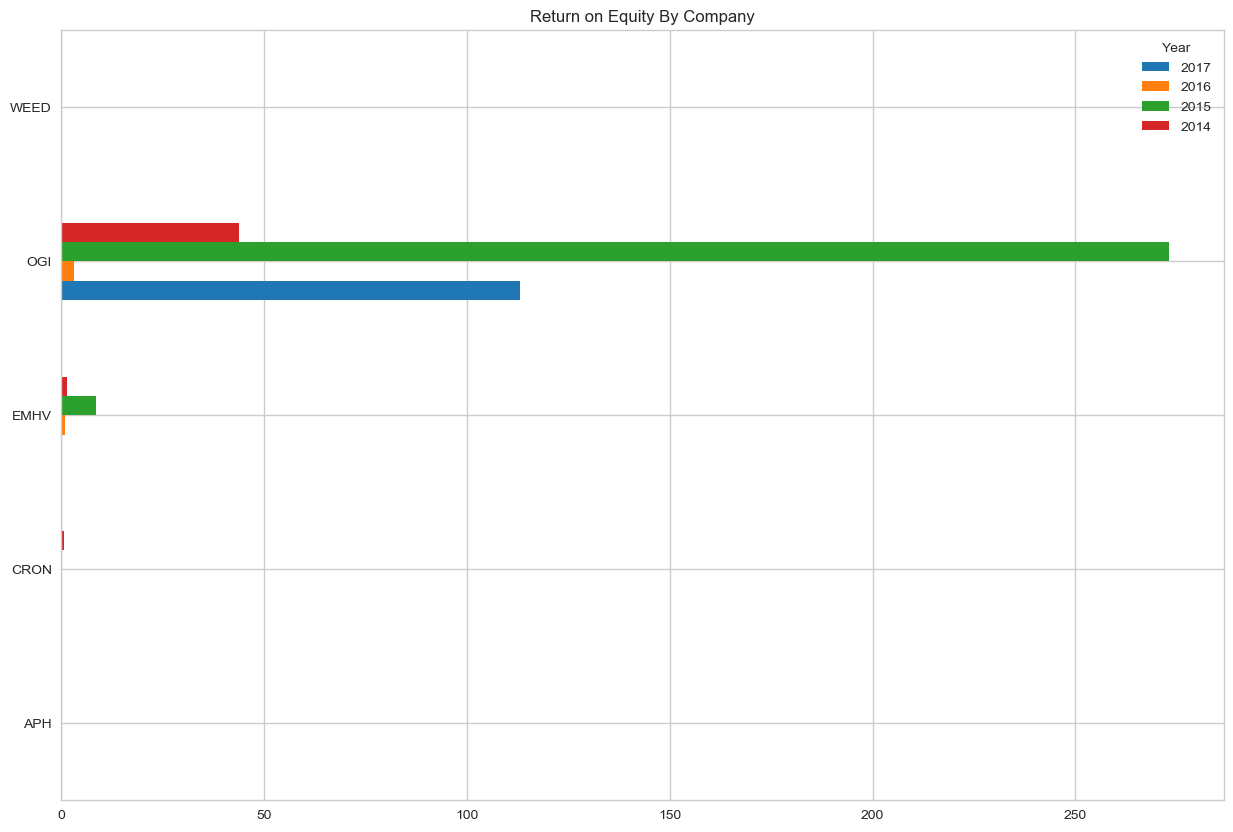

In [40]:
RetOnEq1.plot(kind='barh',title='Return on Equity By Company');

In [41]:
PriceEarning = pd.DataFrame({'APH': MarketValue['APH'] / NetIncome['APH'],
                           'CRON': MarketValue['CRON'] / NetIncome['CRON'],
                           'EMHV': MarketValue['EMHV'] / NetIncome['EMHV'],
                           'OGI': MarketValue['OGI'] / NetIncome['OGI'],
                           'WEED': MarketValue['WEED'] / NetIncome['WEED']})
PriceEarning=PriceEarning.round(2)
PriceEarning1 = PriceEarning.round(2).transpose()
PriceEarning1

Year,2017,2016,2015,2014
APH,0.04,0.02,0.02,0.02
CRON,92.70,16.20,17.86,2.25
EMHV,14.44,1.56,0.35,0.58
OGI,0.91,5.72,1.10,0.17
WEED,176.01,351.88,72.23,12.87


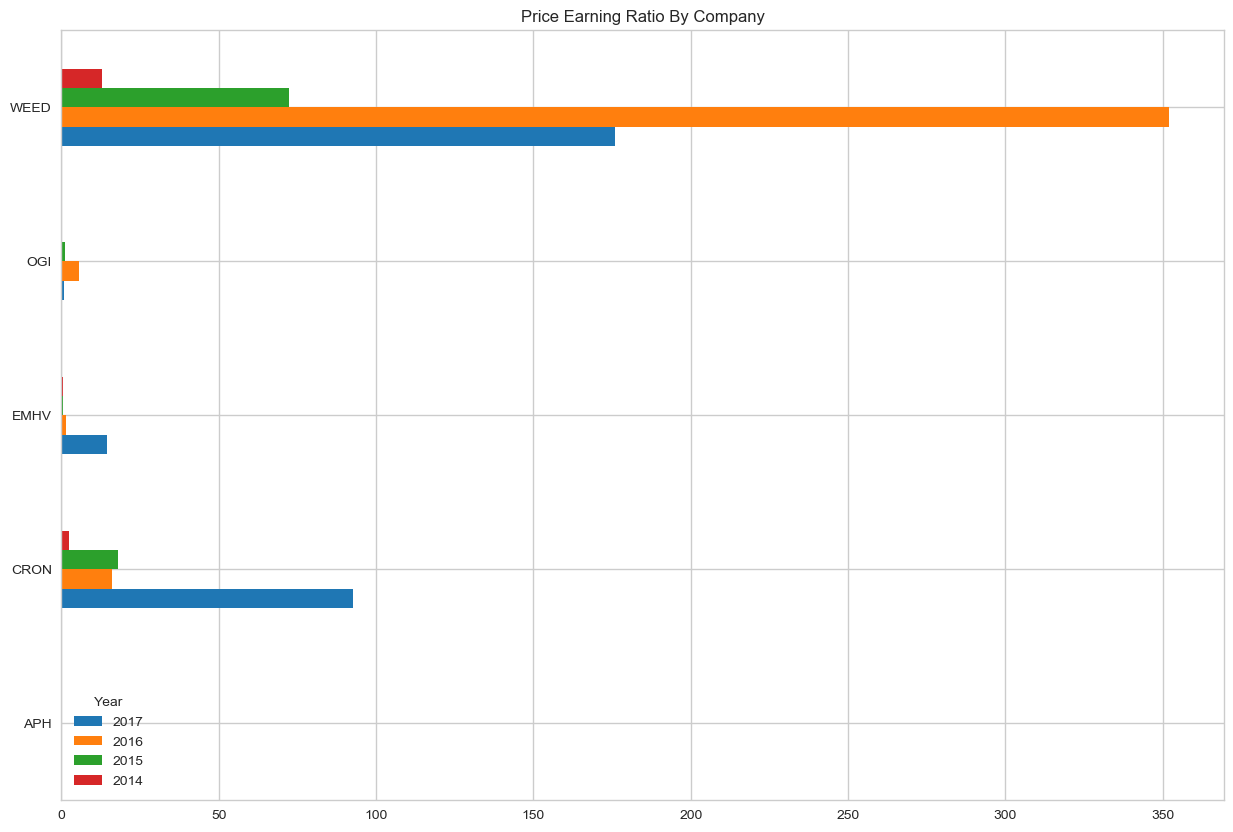

In [42]:
PriceEarning1.plot(kind='barh',title='Price Earning Ratio By Company');

In [43]:
TotalNetIncome = NetIncome.iloc[0].sum()

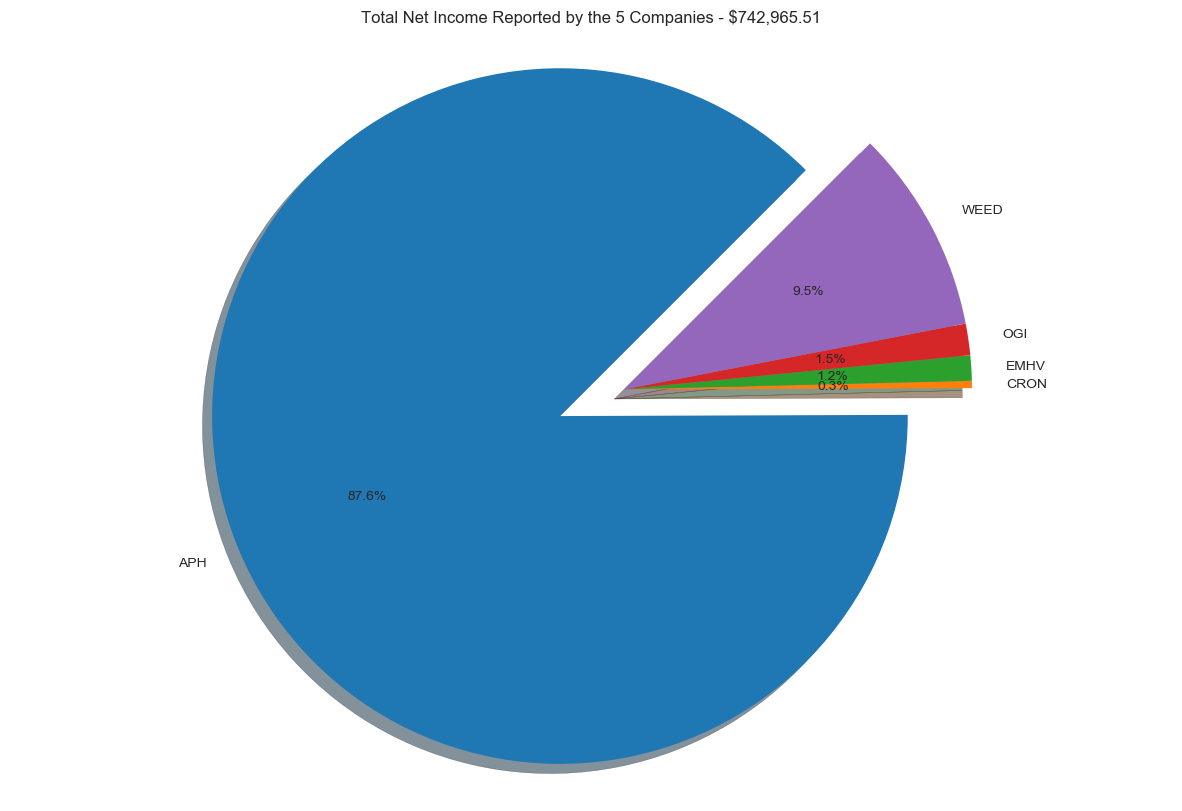

In [44]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = NetIncome.columns
sizes = NetIncome.iloc[0]
explode = (0.2, 0, 0, 0, 0)  # only "explode" the 1st slice (APH)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', 
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Net Income Reported by the 5 Companies - $' + str('{:,.2f}'.format(TotalNetIncome)))
plt.show()


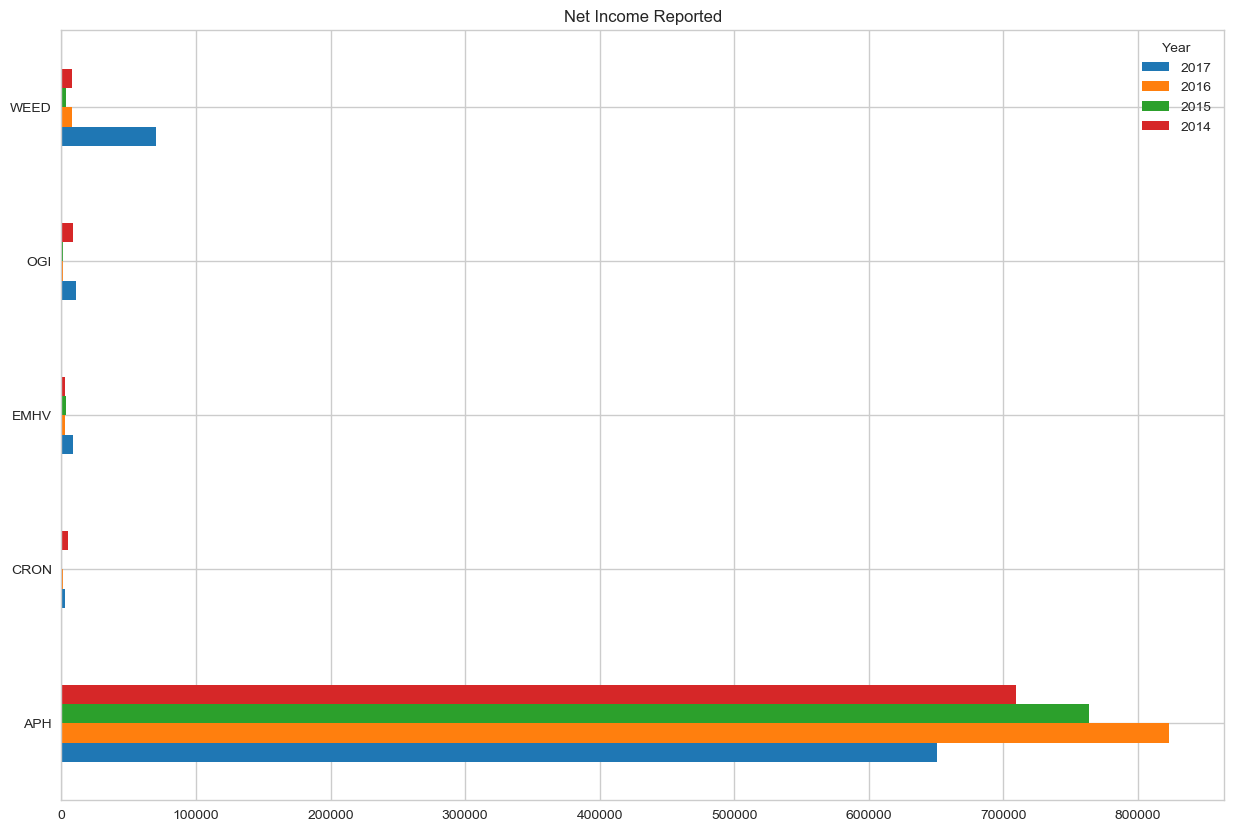

In [45]:
NetIncome1 = NetIncome.transpose()
NetIncome1.plot(kind='barh',title='Net Income Reported');

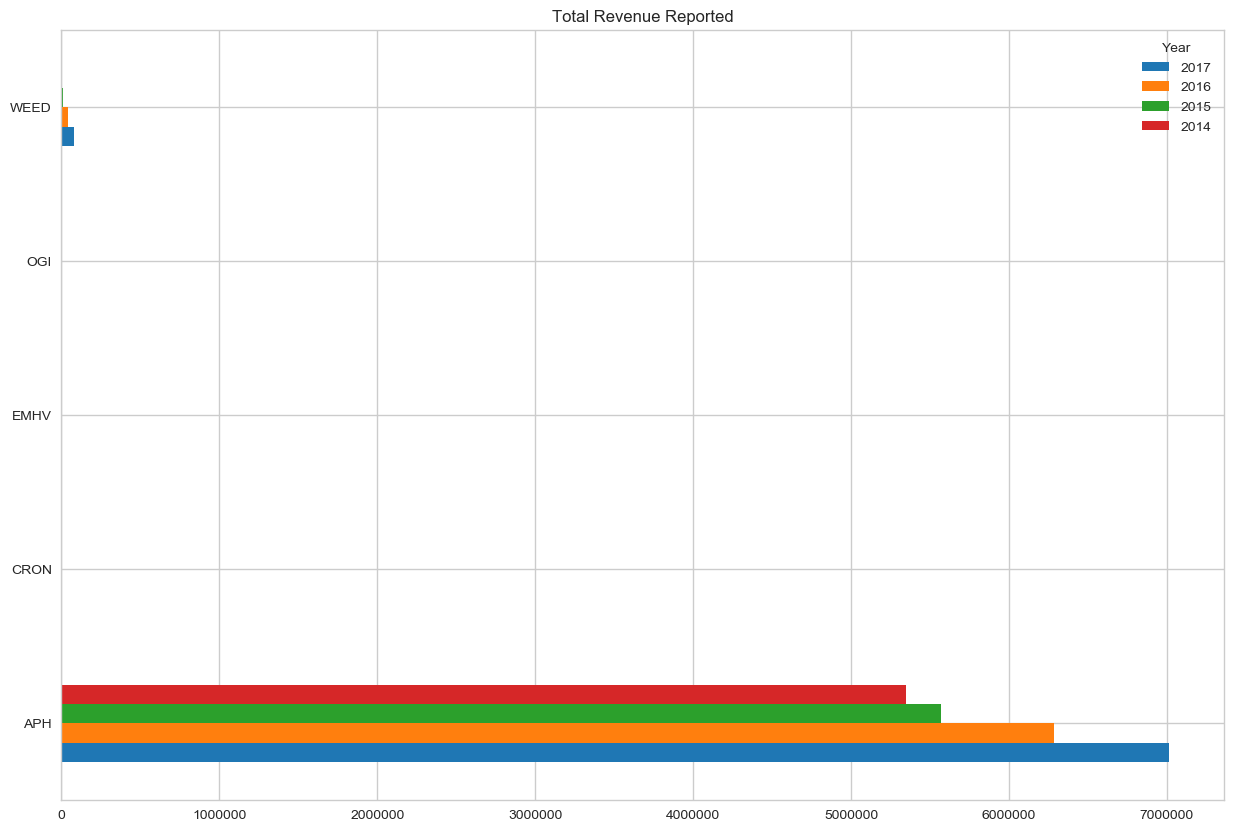

In [46]:
Revenue1 = Revenue.transpose()
Revenue1.plot(kind='barh',title='Total Revenue Reported');

In [47]:
Revenue.iloc[0].sum()

7099981.354

# Helper Code

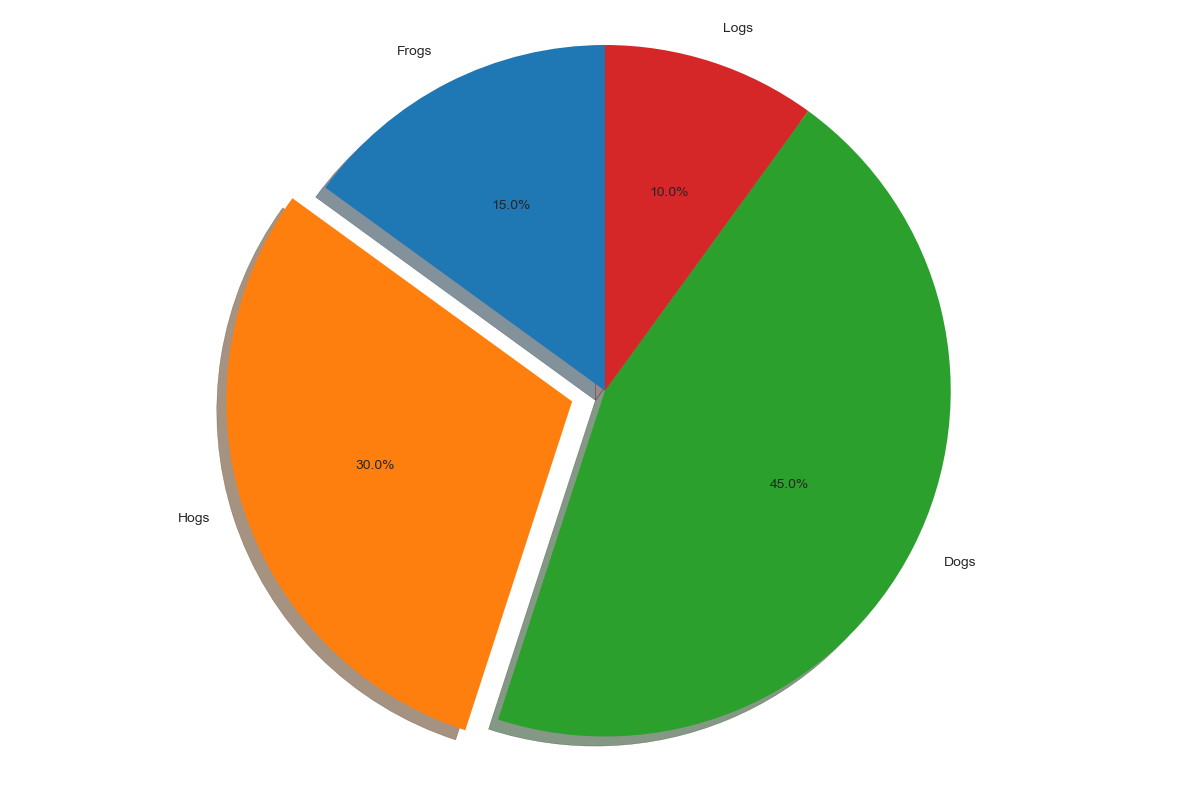

In [48]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

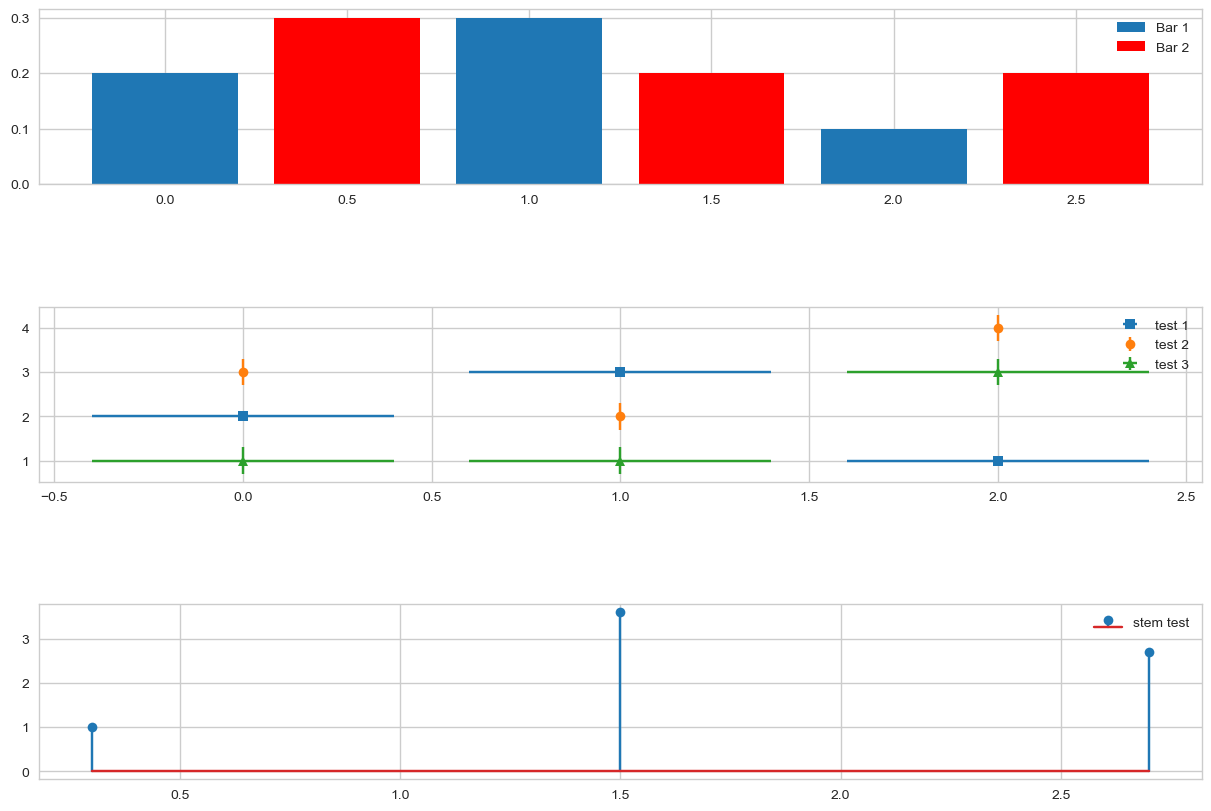

In [49]:
fig, axes = plt.subplots(3, 1)
top_ax, middle_ax, bottom_ax = axes

top_ax.bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, label="Bar 1",
           align="center")
top_ax.bar([0.5, 1.5, 2.5], [0.3, 0.2, 0.2], color="red", width=0.4,
           label="Bar 2", align="center")
top_ax.legend()

middle_ax.errorbar([0, 1, 2], [2, 3, 1], xerr=0.4, fmt="s", label="test 1")
middle_ax.errorbar([0, 1, 2], [3, 2, 4], yerr=0.3, fmt="o", label="test 2")
middle_ax.errorbar([0, 1, 2], [1, 1, 3], xerr=0.4, yerr=0.3, fmt="^",
                   label="test 3")
middle_ax.legend()

bottom_ax.stem([0.3, 1.5, 2.7], [1, 3.6, 2.7], label="stem test")
bottom_ax.legend()

plt.subplots_adjust(hspace=0.7)
plt.show()

In [50]:
x = 
y = 
fig = plt.figure()
ax = fig.add_axes()
ax.plot(x,y)

SyntaxError: invalid syntax (<ipython-input-50-6f54d01752c9>, line 1)

In [ ]:
AnnualAveClose['CRON']

In [ ]:
APH_stocks['Adj Close'].groupby(APH_stocks.index.year).mean()

In [ ]:
CRON_stocks['Adj Close'].groupby(CRON_stocks.index.year).mean()

In [ ]:
EMHV_stocks['Adj Close'].groupby(EMHV_stocks.index.year).mean()

In [ ]:
OGI_stocks['Adj Close'].groupby(OGI_stocks.index.year).mean()

In [ ]:
WEED_stocks['Adj Close'].groupby(WEED_stocks.index.year).mean()

In [ ]:
APH_NetIncome = APH_IncSt.loc['Net Income'].to_frame(name='APH')
APH_NetIncome

In [ ]:
CRON_NetIncome = CRON_IncSt.loc['Net Income'].to_frame(name='CRON')
CRON_NetIncome

In [ ]:
EMHV_NetIncome = EMHV_IncSt.loc['Net Income'].to_frame(name='EMHV')
EMHV_NetIncome

In [ ]:
OGI_NetIncome = OGI_IncSt.loc['Net Income'].to_frame(name='OGI')
OGI_NetIncome

In [ ]:
WEED_NetIncome = WEED_IncSt.loc['Net Income'].to_frame(name='WEED')
WEED_NetIncome

In [ ]:
#ACB_stocks = pdr.get_data_yahoo('ACB.TO', start = '2015-01-01')
#ACB_stocks.head()

In [ ]:
#ACB_IncSt = pd.read_csv(r'C:\Users\annam\SCS\Data4Project\ACB.csv')
#ACB_IncSt.rename(columns={'Revenue':'RC'}, inplace=True)
#ACB_IncSt.set_index('RC',inplace = True)
#ACB_IncSt

In [ ]:
#ACB_BalSh = pd.read_csv(r'C:\Users\annam\SCS\Data4Project\ACB1.csv')
#ACB_BalSh.rename(columns={'Period Ending':'AL'}, inplace=True)
#ACB_BalSh.set_index('AL',inplace = True)
#ACB_BalSh

In [ ]:
#FIRE_stocks = pdr.get_data_yahoo('FIRE.V', start = '2015-01-01')
#FIRE_stocks.head()

In [ ]:
#FIREV_IncSt = pd.read_csv(r'C:\Users\annam\SCS\Data4Project\FIRE.csv')
#FIREV_IncSt.rename(columns={'Revenue':'RC'}, inplace=True)
#FIREV_IncSt.set_index('RC',inplace = True)
#FIREV_IncSt

In [ ]:
#FIREV_BalSh = pd.read_csv(r'C:\Users\annam\SCS\Data4Project\FIRE1.csv')
#FIREV_BalSh.rename(columns={'Period Ending':'AL'}, inplace=True)
#FIREV_BalSh.set_index('AL',inplace = True)
#FIREV_BalSh

In [ ]:
#HEXO_stocks = pdr.get_data_yahoo('HEXO.TO', start = '2015-01-01')
#HEXO_stocks.head()

In [ ]:
#HEXO_IncSt = pd.read_csv(r'C:\Users\annam\SCS\Data4Project\HEXO.csv')
#HEXO_IncSt.rename(columns={'Revenue':'RC'}, inplace=True)
#HEXO_IncSt.set_index('RC',inplace = True)
#HEXO_IncSt

In [ ]:
#HEXO_BalSh = pd.read_csv(r'C:\Users\annam\SCS\Data4Project\HEXO1.csv')
#HEXO_BalSh.rename(columns={'Period Ending':'AL'}, inplace=True)
#HEXO_BalSh.set_index('AL',inplace = True)
#HEXO_BalSh

In [ ]:
#NAM_stocks = pdr.get_data_yahoo('N.V', start = '2015-01-01')
#NAM_stocks.head()

In [ ]:
#NAM_IncSt = pd.read_csv(r'C:\Users\annam\SCS\Data4Project\NAM.csv')
#NAM_IncSt.rename(columns={'Revenue':'RC'}, inplace=True)
#NAM_IncSt.set_index('RC',inplace = True)
#NAM_IncSt

In [ ]:
#NAM_BalSh = pd.read_csv(r'C:\Users\annam\SCS\Data4Project\NAM1.csv')
#NAM_BalSh.rename(columns={'Period Ending':'AL'}, inplace=True)
#NAM_BalSh.set_index('AL',inplace = True)
#NAM_BalSh